In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", connect_args={'check_same_thread': False})

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date)==6).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [6]:
#  3. Convert the June temperatures to a list.
june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date)==6).all()

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns = ['date','temp'])
june_temps_df.set_index(june_temps_df['date'], inplace=True)
june_temps_df = june_temps_df.sort_index()
june_temps_df

,date,temp
date,,
2010-06-01,2010-06-01,78.0
2010-06-01,2010-06-01,73.0
2010-06-01,2010-06-01,77.0
2010-06-01,2010-06-01,69.0
2010-06-01,2010-06-01,76.0
...,...,...
2017-06-30,2017-06-30,76.0
2017-06-30,2017-06-30,75.0
2017-06-30,2017-06-30,75.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


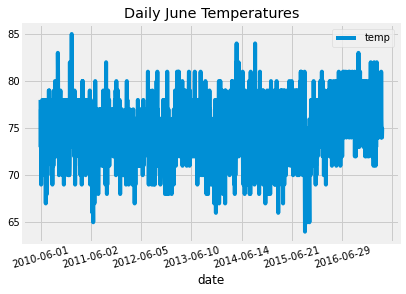

In [9]:
# june temperature line chart
june_temps_df.plot()
plt.title("Daily June Temperatures")
plt.xticks(rotation=15)
plt.savefig("Figures/June_temps.png")

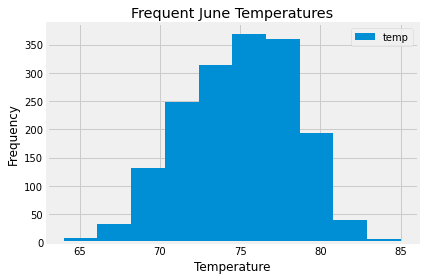

In [10]:
# june temperature frequency
june_temps_df.plot.hist()
plt.xlabel('Temperature')
plt.title('Frequent June Temperatures')
plt.tight_layout()
plt.savefig("Figures/June_temps_freq.png")

## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date)==12).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [12]:
# 7. Convert the December temperatures to a list.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date)==12).all()

In [13]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['date', 'temp'])
dec_temps_df.set_index(dec_temps_df['date'], inplace=True)
dec_temps_df = dec_temps_df.sort_index()
dec_temps_df

,date,temp
date,,
2010-12-01,2010-12-01,76.0
2010-12-01,2010-12-01,73.0
2010-12-01,2010-12-01,72.0
2010-12-01,2010-12-01,78.0
2010-12-01,2010-12-01,72.0
...,...,...
2016-12-31,2016-12-31,67.0
2016-12-31,2016-12-31,72.0
2016-12-31,2016-12-31,66.0


In [14]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


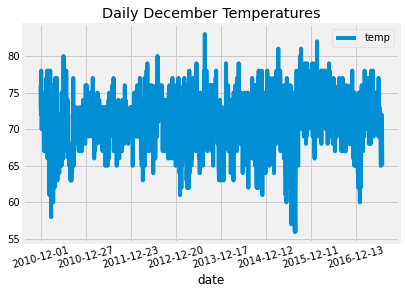

In [15]:
# December temperature line chart
dec_temps_df.plot()
plt.title("Daily December Temperatures")
plt.xticks(rotation=15)
plt.savefig("Figures/Dec_temps.png")

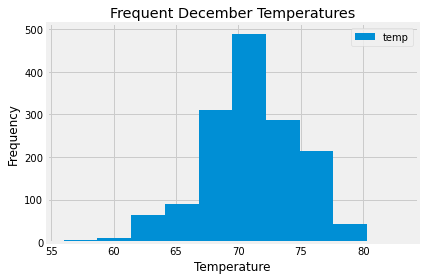

In [16]:
# december temperature frequency
dec_temps_df.plot.hist()
plt.xlabel('Temperature')
plt.title('Frequent December Temperatures')
plt.tight_layout()
plt.savefig("Figures/Dec_temps_freq.png")

In [17]:
## JUNE PRECIPITATION
june_precip = []
june_precip = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month',Measurement.date)==6).all()


june_precip_df = pd.DataFrame(june_precip, columns = ['date','precipitation'])
june_precip_df.set_index(june_precip_df['date'], inplace=True)
june_precip_df = june_precip_df.sort_index()
june_precip_df

,date,precipitation
date,,
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,0.01
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,NaN
2010-06-01,2010-06-01,0.03
...,...,...
2017-06-30,2017-06-30,0.01
2017-06-30,2017-06-30,0.08
2017-06-30,2017-06-30,0.07


In [18]:
june_precip_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


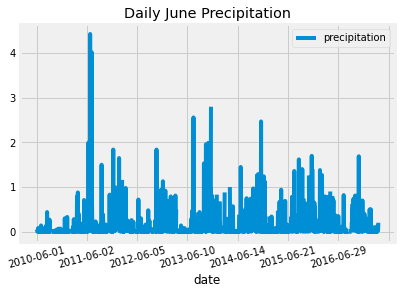

In [19]:
# june temperature line chart
june_precip_df.plot()
plt.title("Daily June Precipitation")
plt.xticks(rotation=15)
plt.savefig("Figures/June_precip.png")

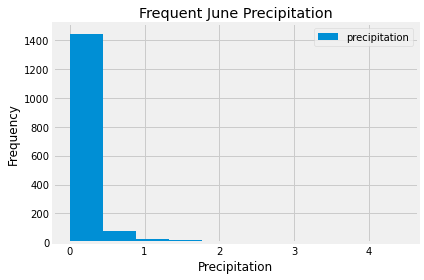

In [20]:
# june temperature frequency
june_precip_df.plot.hist()
plt.xlabel('Precipitation')
plt.title('Frequent June Precipitation')
plt.tight_layout()
plt.savefig("Figures/June_precip_freq.png")

In [21]:
# DECEMBER PRECIPITATION
dec_precip = []
dec_precip = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month',Measurement.date)==12).all()


dec_precip_df = pd.DataFrame(dec_precip, columns = ['date','precipitation'])
dec_precip_df.set_index(dec_precip_df['date'], inplace=True)
dec_precip_df = dec_precip_df.sort_index()
dec_precip_df

,date,precipitation
date,,
2010-12-01,2010-12-01,0.04
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,0.70
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,1.35
...,...,...
2016-12-31,2016-12-31,0.25
2016-12-31,2016-12-31,0.36
2016-12-31,2016-12-31,0.01


In [24]:
dec_precip_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


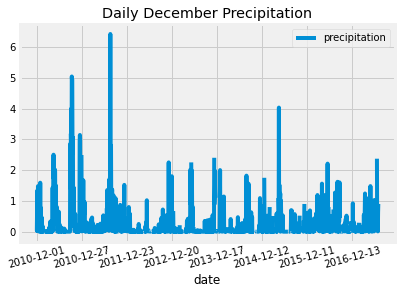

In [22]:
# december temperature line chart
dec_precip_df.plot()
plt.title("Daily December Precipitation")
plt.xticks(rotation=15)
plt.savefig("Figures/Dec_precip.png")

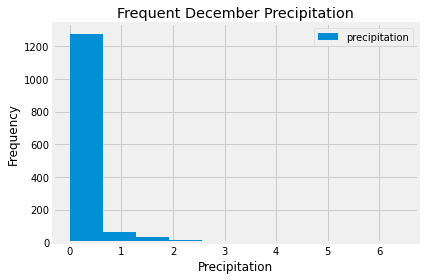

In [23]:
# december temperature frequency
dec_precip_df.plot.hist()
plt.xlabel('Precipitation')
plt.title('Frequent December Precipitation')
plt.tight_layout()
plt.savefig("Figures/Dec_precip_freq.png")